# <center>CNN 2D for image classification<center>

Firstly:<br>

<ol>
  <li>Go to Edit
  <li>Notebook settings
  <li>On hardware accelerator, set GPU
  <li>Save
</ol>

In this way we are able to use the free GPU available on Google Colab to train our model

## Load drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import sys
sys.path.append('/content/drive/MyDrive/IV')

## Load libraries

In [1]:
# Install missing packages

# Libraries
import os
import glob
import cv2
import random
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from utils import CustomDataset, compute_metrics, plot_weights, visTensor

# Import the model
from CNN_128x128 import CNN_128x128

# Style for chart
sns.set_style('darkgrid')
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
plt.rc('font', size=13)

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Load data

labels:
* dogs = 0
* flowers = 1

In [2]:
# Define train and test labels
train_labels = np.zeros(2400)
train_labels[1200:2400] = 1
test_labels = np.zeros(800)
test_labels[400:800] = 1
train_labels = train_labels.astype('uint8')
test_labels = test_labels.astype('uint8')

In [3]:
# Load train set
train_data = [cv2.imread(file) for file in glob.glob('./data/train/dog/*.jpg')]
train_data.extend(cv2.imread(file) for file in glob.glob('./data/train/flower/*.jpg'))

# Load test set
test_data = [cv2.imread(file) for file in glob.glob('./data/test/dog/*.jpg')]
test_data.extend(cv2.imread(file) for file in glob.glob('./data/test/flower/*.jpg'))

In [4]:
# Random shuffle train and test set
train_list = list(zip(train_data,train_labels))
test_list = list(zip(test_data,test_labels))

random.shuffle(train_list)
random.shuffle(test_list)

train_data, train_labels = zip(*train_list)
test_data, test_labels = zip(*test_list)

### Create datasets for train and test & Define useful variables for deep learning model

In [5]:
# Set device where to run the model. GPU if available, otherwise cpu (very slow with deep learning models)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device: ',device)

# Create Dataloader with batch size = 64
train_dataset = CustomDataset(train_data,train_labels)    # we use a custom dataset defined in utils.py file
test_dataset = CustomDataset(test_data,test_labels)       # we use a custom dataset defined in utils.py file

batch_size = 64

trainset = DataLoader(train_dataset,batch_size=batch_size,drop_last=True)    # construct the trainset with subjects divided in mini-batch
testset = DataLoader(test_dataset,batch_size=batch_size,drop_last=True)      # construct the testset with subjects divided in mini-batch

Device:  cuda


In [6]:
# Define useful variables
models_trained_path = './models_trained/'
if not os.path.exists(models_trained_path):                 # create a directory where to save the best model
    os.makedirs(models_trained_path)

best_acc = 0.0
num_epochs = 30                                   # number of epochs
lr = 0.001                                         # learning rate
n_classes = len(np.unique(train_labels))                # number of classes in the dataset
lab_classes = ['Dog','Flower']

# Variables to store the resuts
losses = []
acc_train = []
pred_label_train = torch.empty((0)).to(device)    # .to(device) to move the data/model on GPU or CPU (default)
true_label_train = torch.empty((0)).to(device)

# Model
model = CNN_128x128(input_channel=3,num_classes=n_classes).to(device)

# Optimizer
optim = torch.optim.Adam(model.parameters(), lr=lr)  # to choose
# Loss function
criterion = torch.nn.CrossEntropyLoss() # to choose

### Train the 2D CNN to classify images

In [10]:
losses = []
lr = 0.001
num_epochs = 300
for epoch in range(num_epochs):
    # Train step
    model.train()                                                   # tells to the model you are in training mode (batchnorm and dropout layers work)
    for data_tr in trainset:
        # to do
        X_tr = data_tr[0].view(64,3,128,128).to(torch.float32).to(device)  # to do
        y_tr = data_tr[1].to(torch.long).to(device)  # to do

        # run the model
        # to do

        output = model(X_tr)

        loss = criterion(output, y_tr)

        print(loss)

        optim.zero_grad()
        loss.backward()                                             # compute backpropagation
        optim.step()                                                # parameter update

    losses.append(loss.cpu().detach().numpy())
    acc_t = accuracy_score(true_label_train.cpu(),pred_label_train.cpu())
    acc_train.append(acc_t)
    print("  epoch : {}/{}, loss = {:.4f} - acc = {:.4f}".format(epoch + 1, num_epochs, loss, acc_t))
    if acc_t > best_acc:                                                            # save the best model (the highest accuracy in validation)
        # save the best model in .pt format
        # to do
        best_acc = acc_t

    # Reinitialize the variables to compute accuracy
    pred_label_train = torch.empty((0)).to(device)
    true_label_train = torch.empty((0)).to(device)

torch.save(model.state_dict(), './models_trained/model.pt')


tensor(0.6033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5625, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5699, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5400, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4208, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5492, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7203, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5593, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.9255, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7289, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5822, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5964, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6367, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6317, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6410, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6421, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.6199, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5911, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5929, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5802, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6366, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5674, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7134, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6518, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5871, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5951, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5922, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6189, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5521, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5777, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5473, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6296, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5551, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 2/300, loss = 0.5570 - acc = nan
tensor(0.5805, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5598, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5683, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5820, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5314, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6357, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5099, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6119, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5310, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4683, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5411, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4745, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5626, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4318, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5501, device='cuda:0', grad_fn=<NllLossBackward0

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 3/300, loss = 0.4930 - acc = nan
tensor(0.5947, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5473, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4786, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5409, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4754, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4410, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5443, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5118, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6503, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5606, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4778, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5541, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5192, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7266, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5326, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4783, device='cuda:0', grad_fn=<NllLossBackward0

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4959, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4232, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5065, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5689, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5154, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5659, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5162, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4309, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5081, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4698, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5440, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5166, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5287, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4354, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4498, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4971, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4642, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4419, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4198, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5837, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4245, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4900, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4829, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4075, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3742, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4831, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4436, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6667, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4562, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 6/300, loss = 0.4266 - acc = nan
tensor(0.5492, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4983, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4466, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5105, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4414, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3890, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4942, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4474, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5353, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4425, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4551, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4742, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3803, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5120, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3792, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3974, device='cuda:0', grad_fn=<NllLossBackward0

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.5439, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5241, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4475, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4775, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5996, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4459, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4516, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3649, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3667, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4415, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3487, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5605, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3699, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3821, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4211, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4359, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.5321, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4663, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4875, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4549, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4369, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4569, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5725, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3982, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5245, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3665, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3712, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4202, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3657, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4929, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3928, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3728, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3996, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4857, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4660, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4913, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4466, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3951, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4605, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3887, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4373, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4252, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3847, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4518, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3722, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4878, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3518, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3329, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3844, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3728, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 10/300, loss = 0.4214 - acc = nan
tensor(0.4969, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4804, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3238, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3727, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4653, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4510, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5413, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5363, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4415, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4456, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4795, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4263, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4198, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4673, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5859, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4897, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3720, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4431, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6822, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3713, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4592, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3536, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3359, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4072, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3662, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4831, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3495, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3121, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4460, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5212, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 12/300, loss = 0.3976 - acc = nan
tensor(0.4920, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4707, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4581, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4633, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3717, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3981, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5380, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3903, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3493, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3390, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3596, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4463, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3376, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4682, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3070, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2640, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 13/300, loss = 0.4325 - acc = nan
tensor(0.5633, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6310, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4411, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4239, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3924, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3772, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4752, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4710, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4490, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3269, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4120, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4235, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3426, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5072, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3232, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3794, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4733, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4142, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4233, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3437, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3359, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4574, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3641, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3622, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3131, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3181, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3829, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3248, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4590, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2611, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2520, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3836, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4257, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 15/300, loss = 0.3872 - acc = nan
tensor(0.4893, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5416, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4146, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3686, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3879, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3326, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4617, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4243, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4697, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2888, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4135, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4096, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3787, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4152, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3228, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5223, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4342, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3357, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3312, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3694, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3250, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4530, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3648, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3911, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5146, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4239, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3065, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2172, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3139, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3849, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 17/300, loss = 0.3247 - acc = nan
tensor(0.5211, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4249, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3570, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3404, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3216, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3594, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3826, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3731, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4210, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3216, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3468, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4136, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4606, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3567, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4488, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4283, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3886, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3190, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3782, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3440, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4941, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3485, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3424, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2653, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3251, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3842, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2719, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3342, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2766, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2350, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5035, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 19/300, loss = 0.3083 - acc = nan
tensor(0.4684, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3746, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3657, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3556, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3436, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2794, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4300, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3449, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2709, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3439, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2790, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3255, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1983, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1785, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4271, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3447, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3606, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3998, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2778, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4538, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4099, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3545, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3658, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3275, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3560, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2959, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3839, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2503, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3144, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3474, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 21/300, loss = 0.3260 - acc = nan
tensor(0.4371, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4132, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3446, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3184, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2392, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3415, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3653, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3222, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3260, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3603, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4454, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3363, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3636, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3436, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3071, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.3256, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3284, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2746, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3684, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3227, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3381, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2438, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2880, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3520, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4234, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2325, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2336, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2823, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3297, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2580, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3314, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 23/300, loss = 0.3374 - acc = nan
tensor(0.4169, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3601, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3332, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3800, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3191, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1811, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2811, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2700, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2349, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3533, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3452, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4450, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2719, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3528, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2621, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2027, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.3034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2631, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3491, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3152, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3667, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2545, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2591, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3262, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2746, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4239, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2803, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1944, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2937, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2844, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3351, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1764, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 25/300, loss = 0.3294 - acc = nan
tensor(0.3761, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3939, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3329, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3575, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3691, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2492, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3660, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2993, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2735, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2518, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3178, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4741, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3316, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3638, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2837, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2459, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 26/300, loss = 0.2814 - acc = nan
tensor(0.4175, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2720, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2374, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4090, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3212, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2618, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3687, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2756, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2861, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4320, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4494, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4292, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3433, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3414, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2836, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1976, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2694, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1856, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2600, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2292, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3381, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2368, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3283, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3583, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2676, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3834, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3119, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1589, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2252, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4703, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3036, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 28/300, loss = 0.2540 - acc = nan
tensor(0.3210, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2927, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2721, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1700, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3389, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1537, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2245, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3609, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2782, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2693, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2243, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2894, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2444, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3586, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2297, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1827, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2466, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2324, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3095, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1999, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2386, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1552, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1414, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3379, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1736, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2094, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1243, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1565, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2680, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2123, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 30/300, loss = 0.3909 - acc = nan
tensor(0.4153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2388, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1944, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3079, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2434, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2798, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2499, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1849, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2838, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3071, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2745, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2359, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1971, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1360, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 31/300, loss = 0.2096 - acc = nan
tensor(0.3926, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3571, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2756, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2601, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3718, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2804, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3459, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3745, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2735, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2771, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4914, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3608, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2490, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2996, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3377, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2248, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2384, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1735, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2292, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1874, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1642, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1752, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2928, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1482, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3381, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2889, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2311, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2323, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2725, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2717, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2558, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1664, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1168, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2663, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1976, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1712, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0991, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1359, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1486, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2521, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2547, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1986, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1349, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1958, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2466, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2780, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2995, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2806, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2852, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2732, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3077, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3302, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2494, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2251, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2762, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3764, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3619, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2970, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2569, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2688, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2352, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2391, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2483, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.3850, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2138, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1958, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2552, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2064, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2966, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2816, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2908, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1567, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1885, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3370, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2187, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1841, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1347, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2998, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2350, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0841, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1912, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1122, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1958, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2817, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0896, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1251, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2763, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1588, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1985, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1894, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1472, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1933, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1962, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1932, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2401, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1772, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0905, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1083, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0675, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1157, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1127, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2109, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1213, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2457, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1114, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0999, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1345, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1446, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1176, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1018, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2214, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2168, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1928, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1196, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1741, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1512, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1076, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1710, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1443, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3590, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2725, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2469, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1357, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2145, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2134, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3144, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1660, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 39/300, loss = 0.3307 - acc = nan
tensor(0.2931, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2929, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1547, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1245, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1745, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1167, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1381, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0946, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1943, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1297, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1906, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1541, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1430, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1855, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0966, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2328, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1677, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1155, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1461, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2266, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2675, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1852, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1078, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1986, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1892, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2722, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2561, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2167, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1651, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1852, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1660, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2400, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.3640, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4194, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2921, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1767, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1690, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1877, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1964, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1788, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2759, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2500, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2713, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1133, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1591, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1743, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1753, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1811, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2952, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0937, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1447, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2543, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2586, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2396, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1055, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2633, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2283, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2648, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2900, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2379, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6487, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.7261, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3849, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2738, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.5805, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4439, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5759, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5399, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5136, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5133, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4903, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4844, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4484, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4334, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5557, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4889, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4635, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4308, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3382, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3740, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.3573, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3963, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3840, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5076, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3139, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2410, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2477, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3377, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4709, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3414, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2838, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2048, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2436, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2513, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2674, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2022, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 45/300, loss = 0.3209 - acc = nan
tensor(0.4555, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5838, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3316, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3651, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3288, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2970, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2827, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4146, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3620, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2803, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2289, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3220, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3140, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3452, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2332, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2529, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1348, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1204, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2080, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1086, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1632, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1358, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1403, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1379, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1327, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2114, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1868, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0790, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0790, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0820, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0646, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1559, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1309, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.5866, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5356, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5471, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6444, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5915, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6211, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6355, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5142, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5449, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5297, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5666, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6675, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5449, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4858, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5419, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5750, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 48/300, loss = 0.4856 - acc = nan
tensor(0.5703, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6327, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4699, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4665, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4965, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4837, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4375, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4978, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4585, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4894, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4414, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4262, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4630, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4795, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4492, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.3947, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4924, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3862, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4300, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4496, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3503, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3850, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4160, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4774, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4289, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3311, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4121, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4190, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3542, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4422, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3644, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4360, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.5259, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3591, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4452, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3968, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4578, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3807, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3405, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4267, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4260, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3901, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3306, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3846, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3915, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4730, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4132, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.3572, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4235, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3432, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3721, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4210, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3796, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3573, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3846, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4437, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3407, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2649, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3539, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3767, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2727, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4219, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3604, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3794, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4394, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3341, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4056, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3953, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3585, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3667, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3738, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4076, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3467, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3285, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3996, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3833, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3105, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4382, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3542, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3332, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3670, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.3891, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3194, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3176, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4604, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3547, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3242, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3366, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3478, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3736, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2750, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3141, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3253, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3871, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3770, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3201, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3237, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2936, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3499, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2989, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3969, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3529, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2679, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3366, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3221, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6235, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5702, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6751, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4441, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7914, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5363, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6062, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4304, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3257, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4467, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4147, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3101, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4228, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3783, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3796, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3518, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3847, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3181, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3772, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3266, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3101, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2941, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2735, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 56/300, loss = 0.3107 - acc = nan
tensor(0.4435, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3307, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2329, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2910, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4100, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2698, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3403, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2931, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2778, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2321, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2984, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3451, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2558, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2806, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2472, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1809, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1906, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3147, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1728, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2252, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2870, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1574, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2601, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1755, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1889, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2230, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1900, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1575, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1931, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1677, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1844, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2647, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2088, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3390, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2626, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2904, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2874, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2597, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2316, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2626, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2358, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2698, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2465, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2536, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2452, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2128, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2544, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2585, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2679, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2576, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1336, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1221, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2185, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1183, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2821, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2169, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2103, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1171, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2855, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2777, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1687, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1689, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3400, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1681, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1371, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1567, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1690, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0768, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2079, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1571, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0994, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0907, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0753, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1592, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1617, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1792, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1335, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1170, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1639, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1807, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3529, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1900, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0841, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1666, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0841, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0649, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1723, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0985, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1903, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0940, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0840, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1614, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0658, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0927, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1556, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2136, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1983, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1247, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1480, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1699, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0472, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0745, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0641, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0395, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1302, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1237, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1144, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0843, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2985, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2266, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2259, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0909, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0889, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0969, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0428, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1647, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0564, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0843, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0825, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0885, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1156, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1587, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2235, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0818, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0895, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0688, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1303, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1270, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2602, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2128, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0972, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1821, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3089, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2280, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3670, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1673, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1252, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1132, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1342, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2757, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2373, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2229, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0822, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2442, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1816, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1475, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 65/300, loss = 0.1488 - acc = nan
tensor(0.1847, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1960, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1246, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1399, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0885, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1331, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1057, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0794, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0886, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1509, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1260, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0967, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0626, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0790, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1670, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0512, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0769, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0905, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0858, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1126, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1193, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0889, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1268, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1244, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0350, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0649, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0742, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0979, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1496, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1310, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0689, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0743, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0852, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0796, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0964, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1453, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1586, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0491, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0376, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0104, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0745, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 68/300, loss = 0.1797 - acc = nan
tensor(0.4041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1450, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0281, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0869, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1657, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0965, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0642, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1486, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0756, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0952, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0755, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0622, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0522, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1528, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2838, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2114, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1779, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2263, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0538, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2436, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1227, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1205, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1534, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0770, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1654, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1452, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1186, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0835, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1944, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2175, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1151, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 70/300, loss = 0.3421 - acc = nan
tensor(0.2791, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2233, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1650, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1647, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1944, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0904, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0911, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1135, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1364, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0972, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1600, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1497, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1698, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0900, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0673, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0589, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1536, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1870, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1619, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0477, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1311, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0838, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1269, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0826, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2803, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2758, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0803, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0581, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0939, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0445, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0956, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0669, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1991, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1893, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1297, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1085, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1383, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1246, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1080, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0941, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0980, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1062, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0524, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0796, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0422, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1105, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0637, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0634, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0291, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1428, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0942, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1624, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1205, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1765, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0984, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0941, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0639, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0284, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0367, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0521, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0543, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0535, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 74/300, loss = 0.1809 - acc = nan
tensor(0.1186, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1144, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1731, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0879, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2326, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0871, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0614, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0696, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1265, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0391, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1427, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2539, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0938, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1586, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1430, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1221, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0209, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0835, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0737, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1722, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0833, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1144, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1294, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1277, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2784, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3719, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0830, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0453, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0753, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1082, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0441, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1093, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1270, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0493, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0629, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0482, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0330, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0520, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0945, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0371, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0756, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0585, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0370, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1905, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1199, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1809, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1605, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.3151, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0462, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0823, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0418, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0816, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1599, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1815, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2263, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1129, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0998, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1734, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0737, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1366, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0600, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0821, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1741, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1180, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1120, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0403, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0644, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2811, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0916, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0794, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3000, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1270, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1250, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1440, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0682, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0263, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1227, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0493, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0178, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0210, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1714, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0431, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0317, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0523, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0810, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1540, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0404, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0192, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0545, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1092, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0300, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1617, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0450, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0472, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1910, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1247, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0406, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0544, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0366, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0534, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0410, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0979, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0791, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0943, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0642, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0118, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0489, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0271, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2164, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1281, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1308, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1134, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0475, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0481, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1482, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0404, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0523, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1268, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0783, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0533, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0530, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0710, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0979, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0495, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0511, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0108, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0691, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0680, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0509, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0110, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0494, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0230, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2282, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0675, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0734, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0426, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0416, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0488, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0755, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0142, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0356, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2365, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1463, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0952, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0531, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0477, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1291, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0506, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0549, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0409, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0343, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0250, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1329, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0563, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2856, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0217, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0084, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0775, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1444, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1081, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1774, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 87/300, loss = 0.0302 - acc = nan
tensor(0.0357, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1320, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1824, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1206, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0864, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0870, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0390, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0887, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0734, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0700, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0483, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0226, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 88/300, loss = 0.0449 - acc = nan
tensor(0.0743, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0999, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0237, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0129, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0863, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0498, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0106, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0084, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0380, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0393, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0577, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0208, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0112, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0637, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0555, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 91/300, loss = 0.0046 - acc = nan
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0733, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0921, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0855, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0129, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 93/300, loss = 0.0472 - acc = nan
tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0851, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0357, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0138, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0092, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0519, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0241, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0079, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0243, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0159, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0577, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0389, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1316, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0447, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0282, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0998, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0182, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0284, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1845, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0221, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0305, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0108, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0265, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0468, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0637, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1694, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0463, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0531, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1085, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0498, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0416, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0299, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0368, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0103, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0709, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0110, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0783, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0126, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0316, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0689, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0086, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0201, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0399, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 98/300, loss = 0.0251 - acc = nan
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0749, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0239, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0052, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 99/300, loss = 0.0027 - acc = nan
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0709, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0092, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0154, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0593, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1349, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0050, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 101/300, loss = 0.0503 - acc = nan
tensor(0.1236, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1657, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1086, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0101, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0514, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1750, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0103, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0590, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0373, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0838, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1147, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2864, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0339, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0807, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1248, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1962, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0797, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1278, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1515, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0695, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1873, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0103, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0451, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1377, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0711, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0086, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0463, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0620, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0697, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0330, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0397, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0291, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0066, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0646, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0532, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1161, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0455, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3892, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4611, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3645, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 107/300, loss = 0.0569 - acc = nan
tensor(0.0803, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1624, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0699, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1576, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0896, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0458, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0383, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0194, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0391, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0517, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0460, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0996, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1246, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0052, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0101, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0183, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0106, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0082, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0255, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1188, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1146, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1251, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2221, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1767, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0754, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0557, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1634, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1691, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0743, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0700, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0500, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0586, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1267, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0831, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0526, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0951, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0438, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1154, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2207, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1335, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0132, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0248, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0181, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0441, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0530, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0283, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0400, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1421, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0449, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0627, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0515, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 114/300, loss = 0.0297 - acc = nan
tensor(0.0432, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0772, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0662, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1709, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0372, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0374, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1738, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3275, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0513, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0252, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0112, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1152, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0209, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0424, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0401, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0734, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0348, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0419, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0583, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0177, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0439, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1581, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0727, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0423, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0259, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0588, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0742, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0303, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0826, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0110, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1875, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0517, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 117/300, loss = 0.0574 - acc = nan
tensor(0.1256, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0990, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0699, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1253, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2249, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0784, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0456, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0421, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1429, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0745, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0477, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0821, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0287, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0108, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0084, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0695, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0403, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0205, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0349, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0240, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0445, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0065, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0132, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0277, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0423, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0065, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0159, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 121/300, loss = 0.0025 - acc = nan
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0741, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0387, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0515, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0125, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2399, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1151, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0356, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0247, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1932, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0445, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1445, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0392, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0936, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0708, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0395, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0755, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1591, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0873, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0654, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0337, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0408, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 125/300, loss = 0.0193 - acc = nan
tensor(0.1710, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0930, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0131, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0791, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0556, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0495, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0466, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0378, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1666, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1126, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1515, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0932, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 126/300, loss = 0.0365 - acc = nan
tensor(0.0255, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1388, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0208, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0667, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0719, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0402, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0185, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0304, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 127/300, loss = 0.0181 - acc = nan
tensor(0.1374, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1791, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0442, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1277, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0117, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0533, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0661, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0627, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0690, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0735, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.9766e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.1177e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', 

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 134/300, loss = 0.0008 - acc = nan
tensor(9.2763e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0650, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.8771e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.8013e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<Nl

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 135/300, loss = 0.0017 - acc = nan
tensor(9.6146e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0721, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.8702e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.3704e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<Nl

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 136/300, loss = 0.0009 - acc = nan
tensor(7.2933e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0599, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.2931e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.0215e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<Nl

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0676, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.7484e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.0035e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', 

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0693, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3326e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.2459e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', 

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.6535e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.4656e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', 

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0689, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.9650e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.6575e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', 

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(7.3132e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.7567e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', 

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 142/300, loss = 0.0008 - acc = nan
tensor(5.0126e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0615, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.7874e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.9367e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<Nl

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0692, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.3317e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.0889e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', 

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.5237e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.8933e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.6842e-05, device='cuda:

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 145/300, loss = 0.0006 - acc = nan
tensor(3.2713e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0618, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3845e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLos

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0137, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1354, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1390, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1561, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1660, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3278, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3112, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1278, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1375, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6435, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2649, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 147/300, loss = 0.1671 - acc = nan
tensor(0.1927, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2771, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2119, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1197, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0822, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1145, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2139, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2272, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1154, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0795, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1071, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1610, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1257, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0708, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2053, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0311, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0853, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0693, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0601, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0435, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0190, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0134, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0846, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1055, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0297, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0084, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0852, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0371, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0364, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0096, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0118, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0117, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0199, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0779, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0155, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0106, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0103, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1645, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0232, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0386, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0275, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1968, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1103, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0730, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0340, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0096, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0098, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0282, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1430, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0262, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0544, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0713, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1362, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0106, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0081, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0950, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0246, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0566, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0614, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0331, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2457, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0227, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0992, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1788, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0633, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0524, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2491, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0904, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0971, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0594, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0307, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0407, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1111, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0632, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1183, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0718, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0793, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0119, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0661, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0569, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0521, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0643, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1699, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0399, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1382, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0335, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0747, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0986, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3270, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0291, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0379, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1211, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0522, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0377, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 159/300, loss = 0.0844 - acc = nan
tensor(0.0211, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0779, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0655, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0276, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0064, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0056, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0165, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0118, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0478, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0135, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0800, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0435, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0581, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0707, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0395, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0247, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0603, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0589, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2133, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0583, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0296, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1612, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0643, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1275, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0292, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 164/300, loss = 0.0109 - acc = nan
tensor(0.0198, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0743, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0736, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0600, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0491, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0101, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0660, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0231, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0114, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0424, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0591, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0150, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0163, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0108, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1109, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0162, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0487, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0886, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1789, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0279, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0861, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0481, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0092, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0096, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0890, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0318, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0541, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0829, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0213, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0195, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0847, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0198, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0176, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0361, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0291, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0086, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0257, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0624, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0154, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0288, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0145, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0037, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0626, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0467, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0412, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0285, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0396, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0590, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0273, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0271, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2666, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0415, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0245, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0793, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0207, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1700, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0152, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1605, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0669, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0076, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0189, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1380, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0081, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0321, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 173/300, loss = 0.1288 - acc = nan
tensor(0.2183, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2140, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2118, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1926, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2121, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0982, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0589, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0851, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0897, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1130, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1534, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2420, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1176, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0879, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0775, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0345, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0127, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0220, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0253, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0656, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0506, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0334, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0615, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 175/300, loss = 0.0261 - acc = nan
tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1316, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0789, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0636, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0354, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1147, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0539, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0892, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0455, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0329, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0333, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1199, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0856, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0483, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0312, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0138, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0452, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0960, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0112, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0128, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0872, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0214, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0545, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0547, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0632, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0175, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0151, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0264, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0514, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0434, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0187, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0633, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0823, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0437, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0483, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0789, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0351, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0113, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0267, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0339, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0280, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0238, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0151, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0216, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0137, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0227, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0152, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0274, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0066, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0683, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0096, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1242, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0682, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0160, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1230, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2826, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0891, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0223, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0964, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0453, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0831, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0488, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0469, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0802, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0387, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0498, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0729, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1724, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0577, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0493, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1101, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0617, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0715, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0130, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0120, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0811, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0260, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0269, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0362, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0178, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0153, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0310, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0052, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0782, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0436, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0484, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0631, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0733, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0613, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0813, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0563, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0105, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0086, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0365, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0095, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 186/300, loss = 0.0024 - acc = nan
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0663, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0065, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0322, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0092, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1681, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0036, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0091, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0074, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0046, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0102, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 188/300, loss = 0.0009 - acc = nan
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0560, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0668, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2855e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.1087e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3614e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.7186e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', 

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(7.5754e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0653, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4519e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.7950e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 193/300, loss = 0.0005 - acc = nan
tensor(5.6607e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0627, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0398e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.8433e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<Nl

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(1.5840e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.6766e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.9140e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 195/300, loss = 0.0004 - acc = nan
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0562, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.7602e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.5766e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.4854e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<Nl

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 196/300, loss = 0.0007 - acc = nan
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0581, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.3348e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.2189e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLos

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5583e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.2096e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.6793e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(3.0453e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5893e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.2153e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.8541e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.6709e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.5751e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, d

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0602, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.9001e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.2326e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.1099e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.7479e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.5256e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, devic

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(6.6568e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.4430e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.3608e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.3290e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.7981e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, devic

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8012e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.8566e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5658e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.4816e-05, device='c

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 202/300, loss = 0.0007 - acc = nan
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0505, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.2800e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.5061e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLos

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(3.6089e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.4370e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.1548e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.6831e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.8314e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, devic

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(3.6495e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.9040e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.7876e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.9665e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.7215e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.3117e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, d

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 205/300, loss = 0.0007 - acc = nan
tensor(4.9849e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0506, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.1188e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.8778e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.9731e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.4436e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', gra

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(9.2806e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0461, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.7739e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.5063e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.5805e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.8890e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.2203e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.4258e-0

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(3.1500e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0498, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1448e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.4347e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.7763e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.5223e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.0045e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.7406e-0

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.1146e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.1738e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.5700e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.0441e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.7991e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8201e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0635e-0

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.5281e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.9356e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.7886e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.6218e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.0388e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5939e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.7455e-0

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 210/300, loss = 0.0010 - acc = nan
tensor(3.4154e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0499, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4281e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.7210e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4895e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.5261e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.4914e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0',

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0481, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.2085e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.6579e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.1755e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8747e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.6803e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.7377e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.9342e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.002

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(3.2827e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0434, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.6807e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.2115e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.8660e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.4677e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.8744e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8085e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.730

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(2.8228e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.5428e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.3573e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.5586e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3916e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4587e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.0216e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9090e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.3769e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.2825e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.6735e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2163e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1254e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.1142e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.0888e-0

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4993e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8686e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.2710e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.7452e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2555e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.6700e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.3088e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.366

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0446, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.9507e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.4417e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3756e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.7998e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.6873e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.5746e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, d

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 217/300, loss = 0.0008 - acc = nan
tensor(3.5558e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0440, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2452e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8330e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.2894e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.6499e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.9172e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.5461e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 218/300, loss = 0.0005 - acc = nan
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0419, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2031e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.8419e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.2450e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0506e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.0552e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.8651e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0',

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.3360e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1240e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.6926e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.4155e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3518e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.6344e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.9470e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.1789e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0418, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.3400e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3928e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.7500e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.9644e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.6716e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2116e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.0045e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.838

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0459, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.2272e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4628e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.4442e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4151e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3357e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.3830e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.3026e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.603

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0473, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.6569e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.4391e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.8113e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.0424e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.3569e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.0118e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.5108e-0

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 223/300, loss = 0.0004 - acc = nan
tensor(2.4073e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0470, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0428e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.4261e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.6794e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.9547e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2383e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.6845e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0463, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5074e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1195e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.3634e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.9375e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5336e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1957e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.0456e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.823

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(1.0343e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.7665e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.9300e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.8987e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.2246e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2947e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.5787e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.617

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 226/300, loss = 0.0001 - acc = nan
tensor(9.4729e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0461, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.7787e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2695e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.3500e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.0625e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.7799e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.6170e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 227/300, loss = 0.0002 - acc = nan
tensor(9.9735e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0473, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4680e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.6477e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.3869e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3422e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3874e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.7610e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 228/300, loss = 0.0002 - acc = nan
tensor(2.5945e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0372, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.0681e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.1651e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3046e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.5480e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.5524e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0',

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(8.1439e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5444e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.2499e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1972e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.5245e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4814e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9651e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.6889e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.1108e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tens

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2094e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5195e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.6814e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.2544e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9218e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2252e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.2708e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9917e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.4553e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1098e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.4149e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.7907e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.4478e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.9396e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.7732e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.4913e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0454, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0587e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.2547e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.2198e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.8516e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.2600e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2463e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2573e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.170

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 233/300, loss = 0.0003 - acc = nan
tensor(1.1251e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0451, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0199e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5927e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.0423e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4941e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.3899e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0',

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.5821e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.6774e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.4131e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.9246e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.0696e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.7082e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1604e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.9991e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0453, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1817e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.7630e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.6465e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.3829e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.2108e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3991e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.9302e-07, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.189

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 236/300, loss = 0.0002 - acc = nan
tensor(1.0095e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0457, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0467e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.0424e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.0241e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.8928e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.5015e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.2409e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0453, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.7055e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.2918e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.8922e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0977e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.9788e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.6636e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.5518e-07, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.763

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.1264e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.3721e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.8614e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.9189e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.7863e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0747e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.9710e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.605

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0440, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4919e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5590e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.7304e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0058, device='cuda:

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 240/300, loss = 0.5943 - acc = nan
tensor(0.5587, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5301, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4868, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5980, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3302, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5486, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4344, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3825, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4241, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5620, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4404, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4306, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4384, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5104, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4047, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4225, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4118, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3763, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3537, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3790, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3360, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4609, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4071, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3702, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3804, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3744, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3395, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2598, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2379, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3208, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2905, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2896, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1849, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2396, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2841, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2644, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2201, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3307, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1882, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2426, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2119, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2099, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2530, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1135, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1115, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1930, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1628, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1207, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1686, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1921, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0811, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0838, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1682, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1358, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1324, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1387, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1808, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1228, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1342, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1400, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1217, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0815, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0433, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0631, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0974, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0678, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0530, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0979, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0309, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0430, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1311, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0564, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0486, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0928, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0637, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0802, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0915, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0275, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0191, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0161, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0627, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0672, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 245/300, loss = 0.0451 - acc = nan
tensor(0.0921, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1797, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2461, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2497, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2689, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2151, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1519, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2660, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1527, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2911, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2315, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2389, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1897, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3431, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2410, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2069, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.2669, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1149, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0160, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0587, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0545, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0504, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0824, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0839, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0618, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0379, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0497, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0723, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0552, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0388, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0423, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0480, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 247/300, loss = 0.0812 - acc = nan
tensor(0.0626, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0511, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1231, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1530, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0449, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0933, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0336, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0148, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0320, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0862, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0459, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1709, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0200, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.1695, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0219, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1754, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1736, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3609, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1536, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0893, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0356, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0270, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0369, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0807, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4082, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1189, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.4299, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0985, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0244, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0315, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0360, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1096, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0938, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1226, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0845, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0938, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1330, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0586, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0674, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0485, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0448, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 250/300, loss = 0.2301 - acc = nan
tensor(0.6233, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8642, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8193, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6785, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7682, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.8819, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7508, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4932, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2957, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2667, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2852, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2508, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1903, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1911, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1878, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0324, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1409, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0650, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0812, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0371, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0545, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0188, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0308, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0559, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0602, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0540, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0488, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0813, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0330, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0356, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0261, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0065, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1846, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0143, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0069, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0167, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0349, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0106, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0204, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0417, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0857, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0126, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0165, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0459, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1944, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0183, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0078, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0139, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0073, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0466, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0149, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0288, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0290, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0122, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0052, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1412, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0121, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0144, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0097, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0373, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0301, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0631, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1542, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1107, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0823, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0211, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0071, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2108, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1632, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0579, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0158, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0482, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0532, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0557, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0622, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1545, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0933, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0196, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1071, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0082, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0326, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0116, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0293, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0147, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 257/300, loss = 0.0125 - acc = nan
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1586, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0141, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0142, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0156, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1340, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0104, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0059, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0123, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0060, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0282, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0346, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0215, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 259/300, loss = 0.0047 - acc = nan
tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0680, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0342, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0097, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0254, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0553, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0193, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0216, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0431, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0684, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0045, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0101, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0146, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0278, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0323, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 261/300, loss = 0.1513 - acc = nan
tensor(0.0103, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0682, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0107, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0040, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0176, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0255, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0641, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 262/300, loss = 0.0026 - acc = nan
tensor(0.0393, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0720, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0256, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3204, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0038, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0269, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0418, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1579, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1099, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0626, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1473, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2275, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0746, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0897, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0100, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0563, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0088, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0111, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0496, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0358, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0523, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0174, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0173, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 267/300, loss = 0.0042 - acc = nan
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0769, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.7683e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0464, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0186, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBac

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 268/300, loss = 0.0013 - acc = nan
tensor(0.0077, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0621, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1321, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0031, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1289, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0058, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0681, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0644, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0599, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0295, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0929, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2930, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0347, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0419, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0226, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0166, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0055, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0097, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1356, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0414, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0222, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0169, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0235, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0350, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0133, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0184, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0891, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0114, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0268, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0048, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0091, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0085, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0108, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0090, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0057, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0056, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0053, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0037, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0062, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0656, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0025, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 278/300, loss = 0.0010 - acc = nan
tensor(3.3097e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0521, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.6835e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.1244e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.4225e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0136, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0118, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0039, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0067, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0037, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0447, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0030, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1725, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1184, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1090, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0571, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0234, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0474, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0228, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 281/300, loss = 0.0092 - acc = nan
tensor(0.0051, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0548, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0449, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1942, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1508, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0399, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0450, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0180, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0482, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0109, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0117, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0470, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0108, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0171, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0099, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0441, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0302, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0112, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0054, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0129, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0073, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0034, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0042, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0089, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0212, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0061, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 283/300, loss = 0.0514 - acc = nan
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0661, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0093, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1579, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1769, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0353, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0080, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0100, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0435, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0496, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0241, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1485, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1282, device='cuda:0', grad_fn=<NllLossBackwar

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0206, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0344, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0118, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0041, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0558, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0049, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0645, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0179, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0110, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0313, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0070, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0224, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0068, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0170, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0115, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0112, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0124, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0092, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0218, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0172, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0032, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0539, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0083, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.6439e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0016, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 288/300, loss = 0.0007 - acc = nan
tensor(2.3925e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0513, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.9956e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLos

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(2.7101e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.4277e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', 

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 290/300, loss = 0.0002 - acc = nan
tensor(2.1794e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0557, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(5.8336e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.1479e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<Nl

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 291/300, loss = 0.0004 - acc = nan
tensor(2.7374e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0565, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.7477e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLos

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0535, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(6.4073e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.1925e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', 

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0560, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.7785e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.2502e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0023, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', 

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0483, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.4590e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0011, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 295/300, loss = 0.0003 - acc = nan
tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0510, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.8450e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.6311e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLos

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0503, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.4183e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0014, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.8952e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.2090e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.8690e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='c

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.8861e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.8627e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(2.9983e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.5588e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0018, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.6158e-05, devic

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  epoch : 298/300, loss = 0.0000 - acc = nan
tensor(5.9658e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0402, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0007, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.2359e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(8.0443e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0026, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0001, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.7926e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0019, device='cuda:0', grad_fn

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


tensor(0.0004, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0015, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0009, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3715e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0010, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0003, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.3652e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0024, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(7.5691e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0012, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.1228e-05, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0013, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0022, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0002, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.9357e-06, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(9.1947e-05, d

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


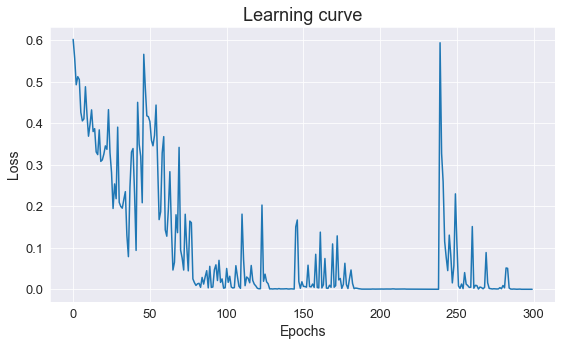

ValueError: x and y must have same first dimension, but have shapes (300,) and (305,)

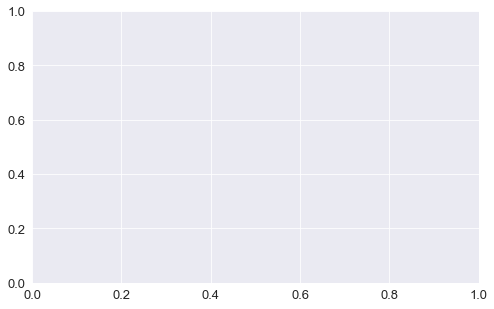

In [11]:
# Plot the results
plt.figure(figsize=(8,5))
plt.plot(list(range(num_epochs)), losses)
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(list(range(num_epochs)), acc_train)
plt.title("Accuracy curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

### Test the trained model

Accuracy: 0.733



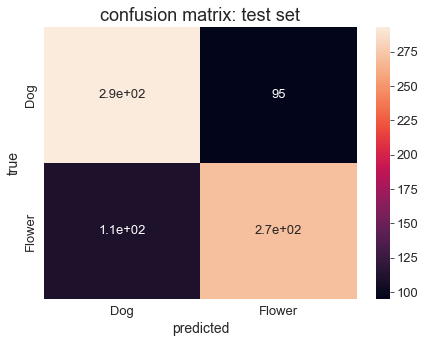

In [12]:
# to use when model is saved
model_test = CNN_128x128(input_channel=3,num_classes=n_classes).to(device)                # Initialize a new model
model_test.load_state_dict(torch.load(models_trained_path+'model.pt'))   # Load the model
# to use when model is saved


pred_label_test = torch.empty((0,n_classes)).to(device)
true_label_test = torch.empty((0)).to(device)

with torch.no_grad():
  for data in testset:
    X_te, y_te = data
    X_te = X_te.view(batch_size,3,128,128).float().to(device)
    y_te = y_te.to(device)
    output_test = model_test(X_te)
    pred_label_test = torch.cat((pred_label_test,output_test),dim=0)
    true_label_test = torch.cat((true_label_test,y_te),dim=0)

compute_metrics(y_true=true_label_test,y_pred=pred_label_test,lab_classes=lab_classes)    # function to compute the metrics (accuracy and confusion matrix)
